In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.display import clear_output # used for google col.
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [2]:
x = [0, 1, 2, 2.5, 3]
y = [1, 2, 3.2, 3.5, 4.2]

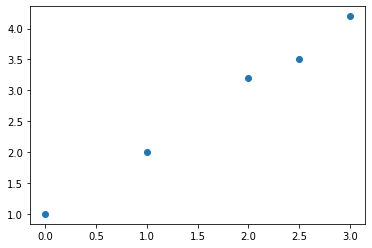

In [6]:
plt.plot(x,y, 'o')

In [8]:
line_inter = np.poly1d(np.polyfit(x,y,1))

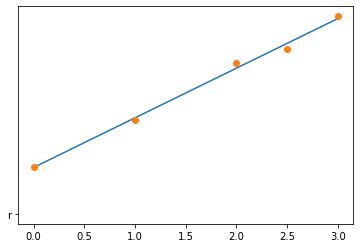

In [12]:
plt.plot(x, line_inter(np.unique(x)))
plt.plot(x,y, 'o', 'r')

# Load Data

In [16]:
# Load Datasets

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [17]:
dftrain.head(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [18]:
y_train = dftrain.pop('survived') # we remove the 'survived' column from the table and save it in another variable
y_eval = dfeval.pop('survived')

# Data analysis

In [46]:
dftrain.head(5)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Note that the survived column is removed!

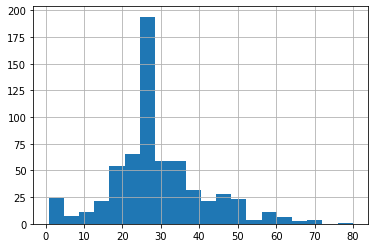

In [33]:
dftrain.age.hist(bins=20)

In [30]:
len(sorted(np.unique(dftrain.age)))

76

In [48]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

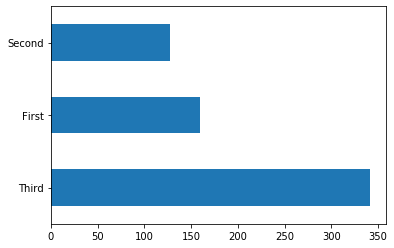

In [37]:
dftrain['class'].value_counts().plot(kind='barh')

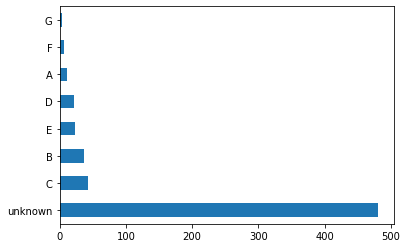

In [38]:
dftrain['deck'].value_counts().plot(kind='barh')

In [40]:
np.unique(dftrain['deck'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'unknown'], dtype=object)

# Pre-processing data

In [51]:
categorical_data = ['sex' , 'class', 'deck', 'embark_town', 'alone']
numerical_data = ['age' , 'n_siblings_spouses','parch','fare']

In [52]:
features_columns = []
for feature in categorical_data:
    vocabolary = dftrain[feature].unique() # we make a list of unique values in each catego. data column of dftrain
    features_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocabolary))

In [54]:
for feature in numerical_data:
    features_columns.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))

In [55]:
features_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='parch', shape=(1,)

# Model

## 1. Input Function

In [57]:
# Function to return a function object that is the input function

def make_input_fn (data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_fn ():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000) # to randomize the data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat the proces for num_epochs=10
        return ds # return a batch of the dataset
    return input_fn #return a function object

In [59]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False)

## 2. Create the model

In [60]:
linear_est = tf.estimator.LinearClassifier(feature_columns=features_columns) # we create a Linear Classifier object from the/
                                                                                # estimator module


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Andi\\AppData\\Local\\Temp\\tmpdrd63nb2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023F52451FC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## 3. Train the model

In [61]:
linear_est.train(train_input_fn)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
I

## 4. Evaluate the model

In [62]:
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-07T21:47:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Andi\AppData\Local\Temp\tmpdrd63nb2\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-07-21:47:08
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7651515, accuracy_baseline = 0.6

In [63]:
print(result['accuracy'])

0.7651515


In [64]:
print(result)

{'accuracy': 0.7651515, 'accuracy_baseline': 0.625, 'auc': 0.8337313, 'auc_precision_recall': 0.7851412, 'average_loss': 0.49858394, 'label/mean': 0.375, 'loss': 0.48679593, 'precision': 0.6666667, 'prediction/mean': 0.44546735, 'recall': 0.74747473, 'global_step': 200}


## 5. Predict

In [65]:
prediction = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Andi\AppData\Local\Temp\tmpdrd63nb2\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [67]:
prediction

[{'logits': array([-2.0711577], dtype=float32),
  'logistic': array([0.11193189], dtype=float32),
  'probabilities': array([0.88806814, 0.11193192], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.38427716], dtype=float32),
  'logistic': array([0.5949043], dtype=float32),
  'probabilities': array([0.40509573, 0.5949043 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([1.6080738], dtype=float32),
  'logistic': array([0.83314383], dtype=float32),
  'probabilities': array([0.16685621, 0.8331438 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},


In [82]:
print(prediction[28]['probabilities'][0]) # probability of dying index [0]
print(y_eval[28])

0.75900114
1


In [80]:
dfeval.iloc[28]

sex                        male
age                          12
n_siblings_spouses            1
parch                         0
fare                    11.2417
class                     Third
deck                    unknown
embark_town           Cherbourg
alone                         n
Name: 28, dtype: object